# *Zusatzbeispiel: Hyperparameter Optimierung*

0. Imports

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from sklearn.datasets import load_diabetes
import os

1. Import and Train/Test split

In [5]:
census = data = pd.read_csv(os.path.join("..", "..", "..", "data", "census.csv"))
census = census.drop(['occupation', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)

# Missing Values: 'workclass'

imp_most_frequent = SimpleImputer(missing_values=' ?', strategy='most_frequent')
census['workclass'] = imp_most_frequent.fit_transform(census['workclass'].to_numpy().reshape(-1,1))

# Encoding:
# SEX: Male: 1, Female: 0
census["sex"] = census["sex"].replace({' Male': 1, ' Female': 0})

# TARGET: >50K: 1, <=50K: 0 
census["target"] = census["target"].replace({' >50K': 1, ' <=50K': 0})

to_encode = ['workclass', 'education', 'marital-status', 'race']
for feature in to_encode:
    one_hot = pd.get_dummies(census[feature], drop_first=True)
    census = census.join(one_hot)
    census.pop(feature)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1),census["target"])

# Normalize: Age und hours-per-week
minmax = MinMaxScaler()

x_train['age'] = minmax.fit_transform(x_train['age'].to_numpy().reshape(-1,1))
x_train['hours-per-week'] = minmax.fit_transform(x_train['hours-per-week'].to_numpy().reshape(-1,1))

x_test['age'] = minmax.fit_transform(x_test['age'].to_numpy().reshape(-1,1))
x_test['hours-per-week'] = minmax.fit_transform(x_test['hours-per-week'].to_numpy().reshape(-1,1))

2. Train the DT model for differnt max_depth's and min_sample_split's:

  0%|          | 0/30 [00:00<?, ?it/s]

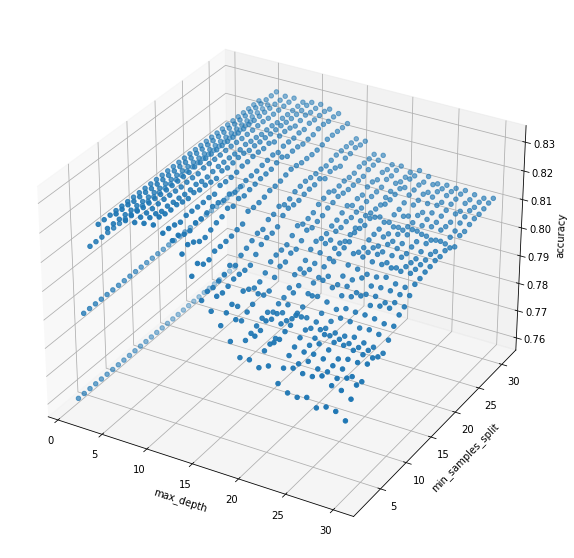

In [7]:
error = []

xs, ys = [], []

for x in trange(1, 31):
    for y in range(2, 32):
        clf = DecisionTreeClassifier(max_depth=x, min_samples_split=y, random_state=1)
        clf.fit(x_train, y_train)
        xs.append(x)
        ys.append(y)
        error.append(accuracy_score(clf.predict(x_test), y_test))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')        
ax.scatter(xs, ys, error)
ax.set_xlabel('max_depth')
ax.set_ylabel('min_samples_split')
ax.set_zlabel('accuracy')
plt.show()